rules of the game : https://cdn.1j1ju.com/medias/85/5e/7c-pickomino-rulebook.pdf

subject : https://team.inria.fr/polaris/files/2023/10/project_2023.pdf

# PART 1: MDP for 1 player

thoughout all the code, a worm is coded by the number 6, so choose dice 6 means choose the worm

## Question 1

We assumed that there was a additional 3 in the subject (otherwise there are 9 dices)

In [6]:
from dice_state import *
from mdp import *

c = 0 # value if you lose the turn
r = [1,1,1,1,2,2,2,2,3,3,3,3,4,4,4,4]
mdp = MDP(c,r)

dices = (1, 3, 3, 3, 4, 4, 5, 6)
score = 0
used = set()
state = DiceState(dices, score, used)

mdp.explore(state)

print(f"Reward vector: {r}, losing cost: {c}, dices: {dices}")
print(f"The optimal strategy is: {mdp.opti[state]}, with expected value {mdp.value[state]}")

Reward vector: [1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4], losing cost: 0, dices: (1, 3, 3, 3, 4, 4, 5, 6)
The optimal strategy is: Continue with dice 4, with expected value 1.3847052945245566


In [7]:
from dice_state import *
from mdp import *

c = -3 # value if you lose the turn
r = [1,1,1,1,2,2,2,2,3,3,3,3,4,4,4,4]
mdp = MDP(c,r)

dices = (1, 3, 3, 3, 4, 4, 5, 6)
score = 0
used = set()
state = DiceState(dices, score, used)

mdp.explore(state)

print(f"Reward vector: {r}, losing cost: {c}, dices: {dices}")
print(f"The optimal strategy is: {mdp.opti[state]}, with expected value {mdp.value[state]}")

Reward vector: [1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4], losing cost: -3, dices: (1, 3, 3, 3, 4, 4, 5, 6)
The optimal strategy is: Continue with dice 4, with expected value 0.6866167395787997


## Question 2

In [5]:
#Probability of obtaining a tile with i or more worms
from mdp import *
from dice_state import *

def compute_worm_prob(worm : int):
    c = 0 # value if you lose the turn
    r = (4*worm) * [0] + [1]*(16 - 4*worm)
    mdp = MDP(c,r)

    mdp.explore_all()

    return mdp.compute_value_total()

for worm in range(4):
    print(f"Probability of obtaining a tile with {worm+1} or more worms: {compute_worm_prob(worm)}")

Probability of obtaining a tile with 1 or more worms: 0.8930267371507402
Probability of obtaining a tile with 2 or more worms: 0.6803307111795147
Probability of obtaining a tile with 3 or more worms: 0.34629328714934327
Probability of obtaining a tile with 4 or more worms: 0.08677521589317934


In [10]:
#Probability of getting exactly tile 24
from mdp import *
from dice_state import *

c = 0 #value if you lose the turn
r = [0,0,0,1] + [0]*100
mdp = MDP(c,r)

mdp.explore_all()

p = mdp.compute_value_total()
print("Probability of getting exactly tile 24 is",p)


Probability of getting exactly tile 24 is 0.3750601883516776


In [11]:
#Probability of getting tile 27 or more
from mdp import *
from dice_state import *

c = 0 #value if you lose the turn
r = [0,0,0,0,0,0,1] + [1]*100
mdp = MDP(c,r)

mdp.explore_all()

p = mdp.compute_value_total()
print("Probability of getting tile 27 of more is",p)

Probability of getting tile 27 of more is 0.5247594468429359


## Verifications

You can see here that we get the same values than the verification values provided on the website

In [14]:
#Verification mdp
from dice_state import *
from mdp import *

c = 0 #value if you lose the turn
r = [1,1,1,1,2,2,2,2,3,3,3,3,4,4,4,4] + [4]*100
mdp = MDP(c,r)

dices = (1, 1, 2, 4, 4, 4, 5, 6)
score = 0
used = set()
state = DiceState(dices, score, used)

mdp.explore(state)

print(mdp.opti[state], "value is", mdp.value[state] )

Continue with dice 4 value is 1.5035075126898982


In [16]:
#Verification mdp
from dice_state import *
from mdp import *

c = 0 #value if you lose the turn
r = [1,1,1,1,2,2,2,2,3,3,3,3,4,4,4,4] + [4]*100
mdp = MDP(c,r)

dices = (1, 3, 4, 4, 6)
score = 9
used = {3}
state = DiceState(dices, score, used)

mdp.explore(state)

print(mdp.opti[state], "value is", mdp.value[state] )
#keeping the 2 four
state2 = (9+8,tuple({3,4}),3)
print("The expected value for keeping the 2 four is:",mdp.value_diceless[state2])

Continue with dice 6 value is 1.0007739864349952
The expected value for keeping the 2 four is: 0.8577674897119344


In [18]:
#Verification mdp
from dice_state import *
from mdp import *

c = 0 #value if you lose the turn
r = [1,1,1,1,2,2,2,2,3,3,3,3,4,4,4,4] + [4]*100
mdp = MDP(c,r)

score = 23
used = {3,5,6}
nbdice = 3

state2 = score, tuple(used), nbdice

mdp.explore_diceless(state2)

print(f"should stop : {mdp.should_stop[state2]}, value is {mdp.value_diceless[state2]}")

should stop : False, value is 1.7256944444444444


In [19]:
#Verification mdp
from dice_state import *
from mdp import *

c = 0 #value if you lose the turn
r = [1,1,1,1,2,2,2,2,3,3,3,3,4,4,4,4] + [4]*100
mdp = MDP(c,r)

score = 21
used = {2,3,4,6}
nbdice = 2

state2 = score, tuple(used), nbdice

mdp.explore_diceless(state2)

print(f"should stop : {mdp.should_stop[state2]}, value is {mdp.value_diceless[state2]} ")

should stop : True, value is 1 


## Part 2 : Learning

For this part, we recommend you to us ethe smaller board by modifying the constants in `constants.py`.


Here is an example of two alpha-beta players playing a game. You can still run it with the large constants, it takes 6.5 sec for us

In [1]:
from alpha_beta_player import AlphaBetaPlayer
from dice_state import DiceState
from run_game import *

p1 = AlphaBetaPlayer(1.0, 1.0)
p2 = AlphaBetaPlayer(1.5, 0.5)

w = run_game(p1, p2)
print(f"Winner is {w}")

Winner is PlayerTurn.PLAYER_2


## Finding best alpha-beta

We used UCB with discrete parameters. This example runs 5000 games with a 10x10 parameter grid and takes 8 minutes (small board).

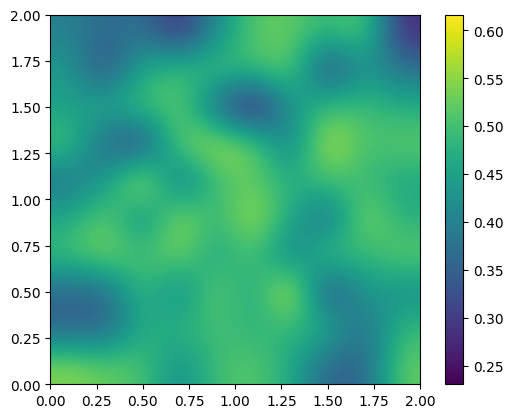

The best pair against (1,1) is: (1.5555555555555554, 1.3333333333333333) with a winrate of 0.6162790697674418


In [2]:
from ucb import *
from alpha_beta_player import AlphaBetaPlayer


p1 = AlphaBetaPlayer(1,1)

num_games = 5000
grid_size = 10

best_pair, best_winrate = simulate_games_ucb(p1, grid_size, num_games)
print(f"The best pair against (1,1) is: {best_pair} with a winrate of {best_winrate}")

## Playing against fixed alpha-beta

We used policy gradient. Details about the feature vector we used can be found in the code and the report.

Here is an example of gradient descent.

We are not sure about the parameters to use for this part.


In [4]:
from reinforce import *
from constants import *
from feature_map import *

w0 = np.array([1 for _ in range(NUM_FEATURES)])

pr = Reinforce(w0,1,1,phi,0.95)


Training for 2000 games takes 40 sec.

In [6]:
pr.train(2000,0.01)

step: 0
w: [1 1 1 1 1 1 1 1 1 1]
gradient norm: 4.535343703429935
step: 100
w: [0.96381836 1.23958318 1.24150919 0.70290218 1.14532247 1.54553747
 0.94419664 0.93508592 1.41264382 1.11657659]
gradient norm: 1.7567075619013879
step: 200
w: [1.427683   1.44048345 1.24280257 0.63909936 1.15773282 2.26562052
 0.94056609 0.94022109 1.43745576 1.14256404]
gradient norm: 3.790739514910061
step: 300
w: [1.15900871 1.74242134 1.22764873 1.20607311 1.04420061 2.77402529
 1.05563271 0.97342421 1.29310278 1.00037832]
gradient norm: 8.17301462991429
step: 400
w: [1.78045385 1.56761253 1.22855663 1.33267209 1.01906456 2.86726378
 1.08075942 0.97155257 1.22601549 0.93334126]
gradient norm: 12.141070279769117
step: 500
w: [2.27825863 1.38466179 1.30048675 1.40436548 1.01911359 2.5714858
 1.08071321 0.97088398 1.2260083  0.93333403]
gradient norm: 3.0859995405074634
step: 600
w: [2.0889015  1.43654495 1.30072766 1.40463505 1.01911155 2.5968033
 1.08071672 0.97050722 1.2260037  0.93332147]
gradient norm

Evaluating the performance over 500 games takes 10sec.

In [7]:
pr.evaluate(500)

0.38

In [4]:
print(pr.w)

[ 1.07817999 -2.61937355  0.85869885  1.12038423  2.77553292  6.31692917
  1.04826051  1.31944893  1.05957952]
